<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction

In [60]:
data = pd.read_csv('Cellphone.csv', encoding='latin-1')
data.head()


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [61]:
data.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [62]:
#data=data.drop(['index'], axis=1)


In [96]:
data.shape

(161, 13)

In [63]:
train_targets=data.Price[:120]
test_targets=data.Price[121:]
data=data.drop(['Price'], axis=1)
train_data=data[:120]
test_data=data[121:]


#(train_data, train_targets), (test_data, test_targets) =  data

In [64]:
train_data.shape

(120, 13)

In [65]:
test_data.shape

(40, 13)

In [66]:
train_targets.shape

(120,)

In [67]:
test_targets.shape

(40,)

In [68]:
train_data[:1]

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,10,135.0,5.2,424,8,1.35,16.0,3.0,13.0,8.0,2610,7.4


In [69]:
# Los 3959 precios medios de los datos de test en miles de $
#test_targets

In [70]:
# 1. Separamos los datos de entrenamiento con los datos de test
#train_data = train_data[:3000]
#test_data = train_data[3001:]
#partial_train_targets = train_targets[:3000]
#partial_eval_train_targets = train_targets[3001:]

In [71]:
# Normalizamos basándonos en las características
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_data.mean(axis=0)
print("##### Media de las 13 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_data -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_data.std(axis=0)
print("##### Desviación estandar de las 13 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_data /= std
#print("##### Datos de entrenamiento normalizados para la primera casa ##### ")
#print(train_data[0])

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_data -= mean
test_data /= std
#print("##### Datos de test normalizados (de la primera casa) con la media y la desviación estándar de los datos de entrenamiento ##### ")
#print(test_data[0])

##### Media de las 13 características de los datos de entrenamiento ##### 
Product_id       624.408333
Sale              98.366667
weight           164.838333
resoloution        5.214667
ppi              326.816667
cpu core           4.883333
cpu freq           1.506300
internal mem      20.166733
ram                2.034700
RearCam           10.007500
Front_Cam          4.043333
battery         2707.833333
thickness          8.714167
dtype: float64
##### Desviación estandar de las 13 características de los datos de entrenamiento ##### 
Product_id       409.719529
Sale              95.154446
weight            73.077443
resoloution        1.279919
ppi              119.483059
cpu core           2.355695
cpu freq           0.540996
internal mem      21.021866
ram                1.397276
RearCam            5.792699
Front_Cam          3.808388
battery         1078.070899
thickness          1.746992
dtype: float64


In [72]:
train_data.shape[1]

13

In [112]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(90, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(90, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

In [113]:
# 2. Hacer aquí las particiones de los datos de entrenamiento
partial_train_data = train_data[:80]
partial_eval_train_data = train_data[81:]
partial_train_targets = train_targets[:80]
partial_eval_train_targets = train_targets[81:]

In [114]:
# 2. Entrenar el modelo con 25 épocas y un batch_size=1
mymodel = build_model()

In [115]:
history = mymodel.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=25, batch_size=1)

Epoch 1/25
80/80 [==============================] - 1s 4ms/step - loss: 5268492.0000 - mean_absolute_error: 2222.0166 - val_loss: 4867192.0000 - val_mean_absolute_error: 2031.9447
Epoch 2/25
80/80 [==============================] - 0s 3ms/step - loss: 5173893.5000 - mean_absolute_error: 2202.1270 - val_loss: 4752126.0000 - val_mean_absolute_error: 2004.2394
Epoch 3/25
80/80 [==============================] - 0s 3ms/step - loss: 4948673.0000 - mean_absolute_error: 2152.6389 - val_loss: 4531498.0000 - val_mean_absolute_error: 1950.4656
Epoch 4/25
80/80 [==============================] - 0s 3ms/step - loss: 4528128.5000 - mean_absolute_error: 2059.3921 - val_loss: 4183090.0000 - val_mean_absolute_error: 1863.6344
Epoch 5/25
80/80 [==============================] - 0s 3ms/step - loss: 3872118.7500 - mean_absolute_error: 1903.7992 - val_loss: 3696011.5000 - val_mean_absolute_error: 1732.7319
Epoch 6/25
80/80 [==============================] - 0s 3ms/step - loss: 3027145.5000 - mean_absolute

In [116]:
mae_history = history.history['val_mean_absolute_error']
accuracy= np.mean(mae_history)
accuracy

1241.3497998046876

In [117]:
mse_history = history.history['val_loss']

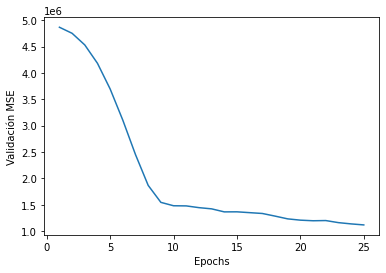

In [118]:
# 3. Confrontar en una gráfica de épocas en el eje de abcisas contra pérdida (MSE) en
# el eje de ordenadas
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

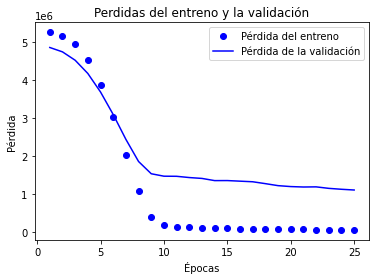

In [119]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

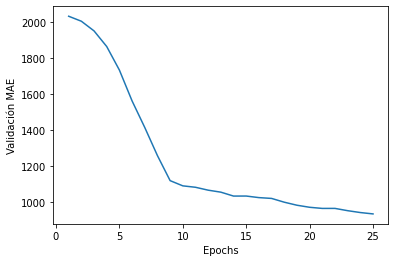

In [120]:
# 4. Confrontar en una gráfica de épocas en el eje de abcisas contra la métrica de 
# error absoluto medio (MAE) 
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

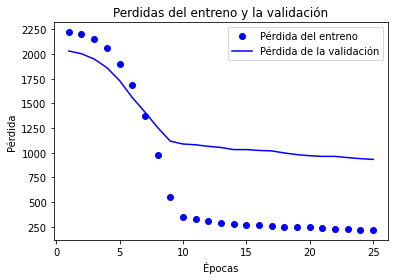

In [121]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [122]:
# 5. Entrenar de nuevo el modelo el número de épocas adecuado para evitar overfitting
mymodel2 = build_model()
history2 = mymodel2.fit(partial_train_data, partial_train_targets,
            validation_data=(partial_eval_train_data, partial_eval_train_targets),
                        epochs=8, batch_size=1)

Epoch 1/8
80/80 [==============================] - 1s 5ms/step - loss: 5259708.5000 - mean_absolute_error: 2220.1196 - val_loss: 4849044.5000 - val_mean_absolute_error: 2028.0587
Epoch 2/8
80/80 [==============================] - 0s 3ms/step - loss: 5134907.5000 - mean_absolute_error: 2193.1599 - val_loss: 4700260.5000 - val_mean_absolute_error: 1992.6885
Epoch 3/8
80/80 [==============================] - 0s 3ms/step - loss: 4835417.0000 - mean_absolute_error: 2127.0054 - val_loss: 4422100.5000 - val_mean_absolute_error: 1925.1488
Epoch 4/8
80/80 [==============================] - 0s 3ms/step - loss: 4302024.0000 - mean_absolute_error: 2004.8894 - val_loss: 3998449.7500 - val_mean_absolute_error: 1816.5513
Epoch 5/8
80/80 [==============================] - 0s 3ms/step - loss: 3537451.2500 - mean_absolute_error: 1812.3992 - val_loss: 3432808.0000 - val_mean_absolute_error: 1658.7424
Epoch 6/8
80/80 [==============================] - 0s 3ms/step - loss: 2517146.5000 - mean_absolute_error

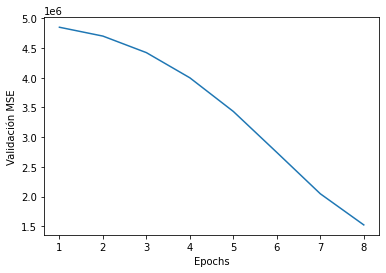

In [123]:
mae_history2 = history2.history['val_mean_absolute_error']
mse_history2 = history2.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history2) + 1), mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

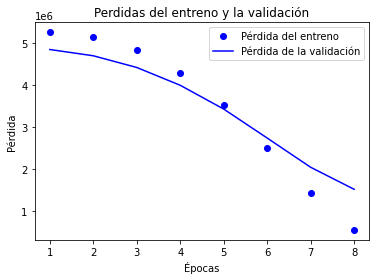

In [124]:
import matplotlib.pyplot as plt

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

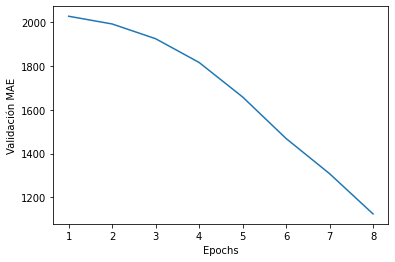

In [125]:

import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history2) + 1), mae_history2)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

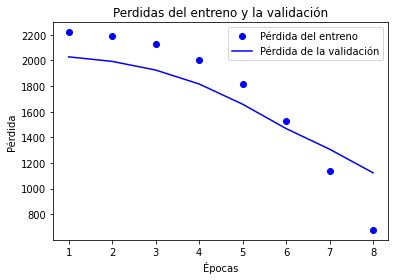

In [126]:
import matplotlib.pyplot as plt

loss = history2.history['mean_absolute_error']
val_loss = history2.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()